In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_excel('practice.xlsx')
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [4]:
x = df.drop(['PE'],axis=1).values
x

array([[  14.96,   41.76, 1024.07,   73.17],
       [  25.18,   62.96, 1020.04,   59.08],
       [   5.11,   39.4 , 1012.16,   92.14],
       ...,
       [  31.32,   74.33, 1012.92,   36.48],
       [  24.48,   69.45, 1013.86,   62.39],
       [  21.6 ,   62.52, 1017.23,   67.87]])

In [5]:
y = df['PE'].values
y

array([463.26, 444.37, 488.56, ..., 429.57, 435.74, 453.28])

In [6]:
lr = LinearRegression()

In [11]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [12]:
X_train

array([[  15.83,   41.67, 1013.39,   74.12],
       [  22.56,   62.26, 1012.11,   63.16],
       [  22.11,   59.8 , 1016.86,   70.14],
       ...,
       [  16.81,   38.52, 1018.26,   75.21],
       [  12.8 ,   41.16, 1022.43,   86.19],
       [  32.32,   67.9 , 1006.08,   37.93]])

In [13]:
Y_train

array([464.93, 445.33, 450.62, ..., 459.01, 462.72, 428.12])

In [14]:
lr.fit(X_train,Y_train)

LinearRegression()

In [22]:
y_pred = lr.predict(X_test)
y_pred

array([431.40245096, 458.61474119, 462.81967423, ..., 432.47380825,
       436.16417243, 439.00714594])

In [17]:
from sklearn.metrics import r2_score

In [24]:
r2_score(y_pred,Y_test)

0.9252876859243365

Note: 92% score is excellent

Text(0.5, 1.0, 'Actual Vs Predicted Vals')

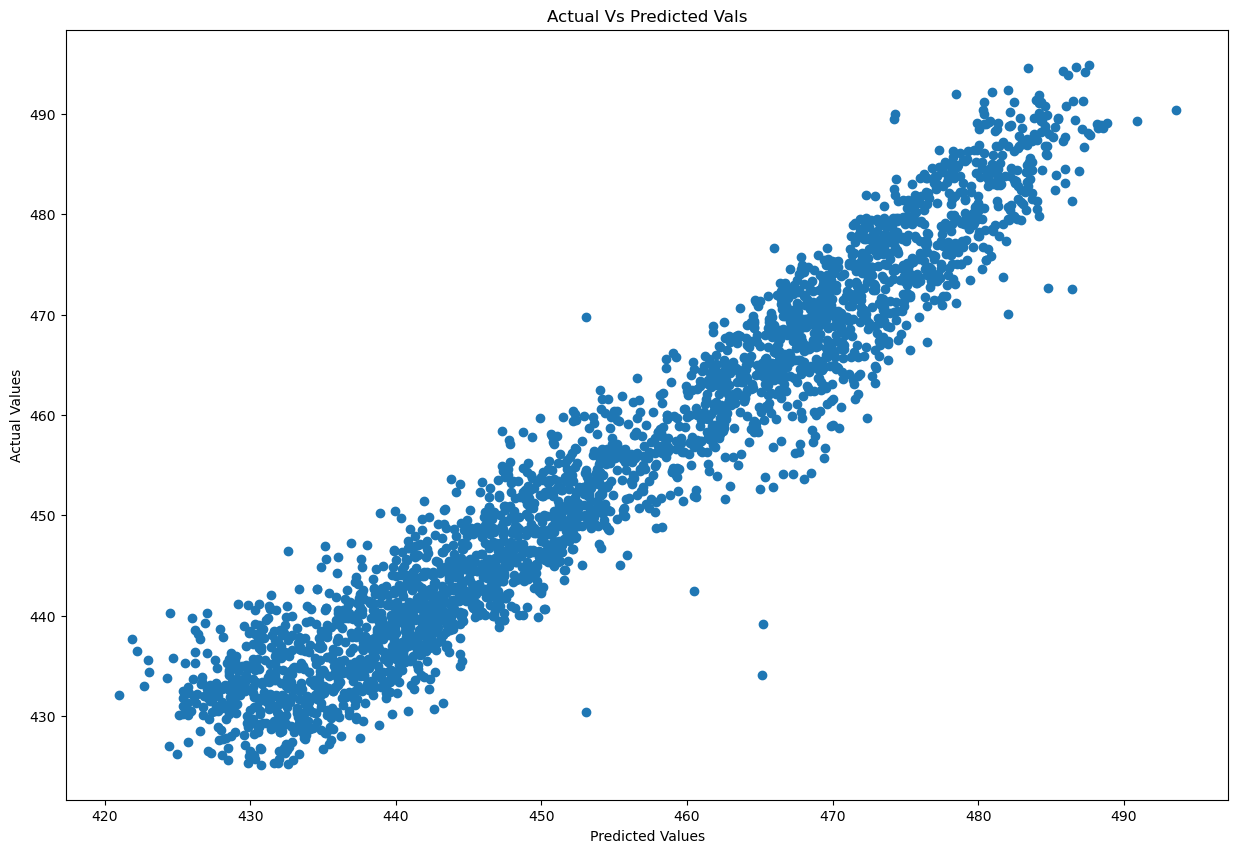

In [28]:
plt.figure(figsize=(15,10))
plt.scatter(y_pred,Y_test)
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.title("Actual Vs Predicted Vals")

In [31]:
pred_y_df=pd.DataFrame({'Actual Value' :Y_test, 'Predicted value' :y_pred,'Difference': Y_test-y_pred})
pred_y_df[0:20]

,Actual Value,Predicted value,Difference
0,431.23,431.402451,-0.172451
1,460.01,458.614741,1.395259
2,461.14,462.819674,-1.679674
3,445.90,448.601237,-2.701237
4,451.29,457.879479,-6.589479
5,432.68,429.676856,3.003144
6,477.50,473.017115,4.482885
7,459.68,456.532373,3.147627
8,477.50,474.342524,3.157476
9,444.99,446.364396,-1.374396
